In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/clean/train.csv').set_index('PassengerId')
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Deck_C,Deck_F,Deck_L,Deck_P,Deck_S,Deck_Unknown,Deck_W,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3.0,22.0,1.0,0.0,7.2500,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [3]:
train.shape

(891, 20)

# Data Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                  test_size = 0.15, random_state = 823, 
                                                  stratify = y)

In [7]:
(x_train.shape, y_train.shape)

((757, 19), (757,))

In [9]:
y_train.mean()

0.3844121532364597

In [8]:
(x_val.shape, y_val.shape)

((134, 19), (134,))

In [10]:
y_val.mean()

0.3805970149253731

# Evaluation

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [12]:
def model_evaluate(model):
    train_acc = round(model.score(x_train, y_train), 2)
    val_acc = round(model.score(x_val, y_val), 2)
    cv_acc = round(np.mean(cross_validate(model, x_train, y_train, cv=5)['test_score']), 2)
    
    print("Training Accuracy: {}".format(train_acc))
    print("Validation Accuracy: {}".format(val_acc))
    print("5-fold CV Accuracy: {}".format(cv_acc))

# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
model_naive_bayes = GaussianNB().fit(x_train, y_train)
model_naive_bayes

GaussianNB(priors=None, var_smoothing=1e-09)

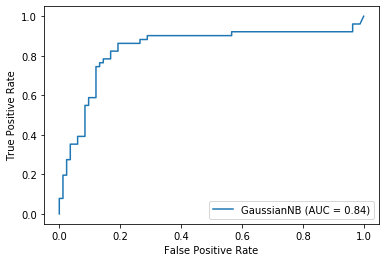

In [15]:
plot_roc_curve(model_naive_bayes, x_val, y_val)

In [16]:
confusion_matrix(y_val, model_naive_bayes.predict(x_val))

array([[44, 39],
       [ 5, 46]])

In [17]:
model_evaluate(model = model_naive_bayes)

Training Accuracy: 0.69
Validation Accuracy: 0.67
5-fold CV Accuracy: 0.67


# K Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
model_knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
hyperparameter = {"n_neighbors": [3, 11, 21, 31, 41, 51], 
                  'weights': ['uniform', 'distance']}
knn_tuning = GridSearchCV(KNeighborsClassifier(), hyperparameter, scoring = 'accuracy').fit(x_train, y_train)
knn_tuning

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 11, 21, 31, 41, 51],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [21]:
model_knn = knn_tuning.best_estimator_
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

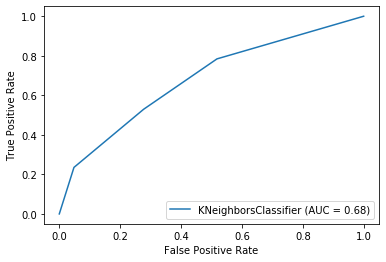

In [22]:
plot_roc_curve(model_knn, x_val, y_val)

In [23]:
confusion_matrix(y_val, model_knn.predict(x_val))

array([[60, 23],
       [24, 27]])

In [24]:
model_evaluate(model = model_knn)

Training Accuracy: 0.85
Validation Accuracy: 0.65
5-fold CV Accuracy: 0.74


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model_logistic_regression = LogisticRegression(max_iter = 500, random_state = 823).fit(x_train, y_train)
model_logistic_regression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=823, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

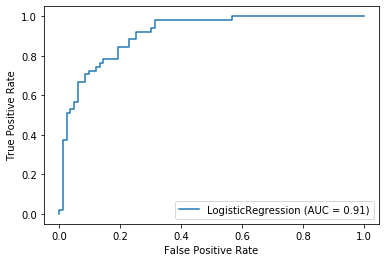

In [27]:
plot_roc_curve(model_logistic_regression, x_val, y_val)

In [28]:
confusion_matrix(y_val, model_logistic_regression.predict(x_val))

array([[70, 13],
       [11, 40]])

In [29]:
model_evaluate(model = model_logistic_regression)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy: 0.81
Validation Accuracy: 0.82
5-fold CV Accuracy: 0.81


# Result

In [30]:
test = pd.read_csv('data/clean/test.csv').set_index('PassengerId')
test.head()

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Deck_C,Deck_F,Deck_L,Deck_P,Deck_S,Deck_Unknown,Deck_W,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,,
892,3.0,34.5,0.0,0.0,7.8292,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
893,3.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
894,2.0,62.0,0.0,0.0,9.6875,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
895,3.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
896,3.0,22.0,1.0,1.0,12.2875,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
result = pd.DataFrame({'PassengerID': test.index.values, 'Survived':  np.nan})
result.head()

,PassengerID,Survived
0,892,NaN
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN


In [37]:
result.Survived = model_logistic_regression.predict(test)
result.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [38]:
# result.to_csv('result.csv', index = False)